In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import ScalarFormatter, MultipleLocator, FormatStrFormatter

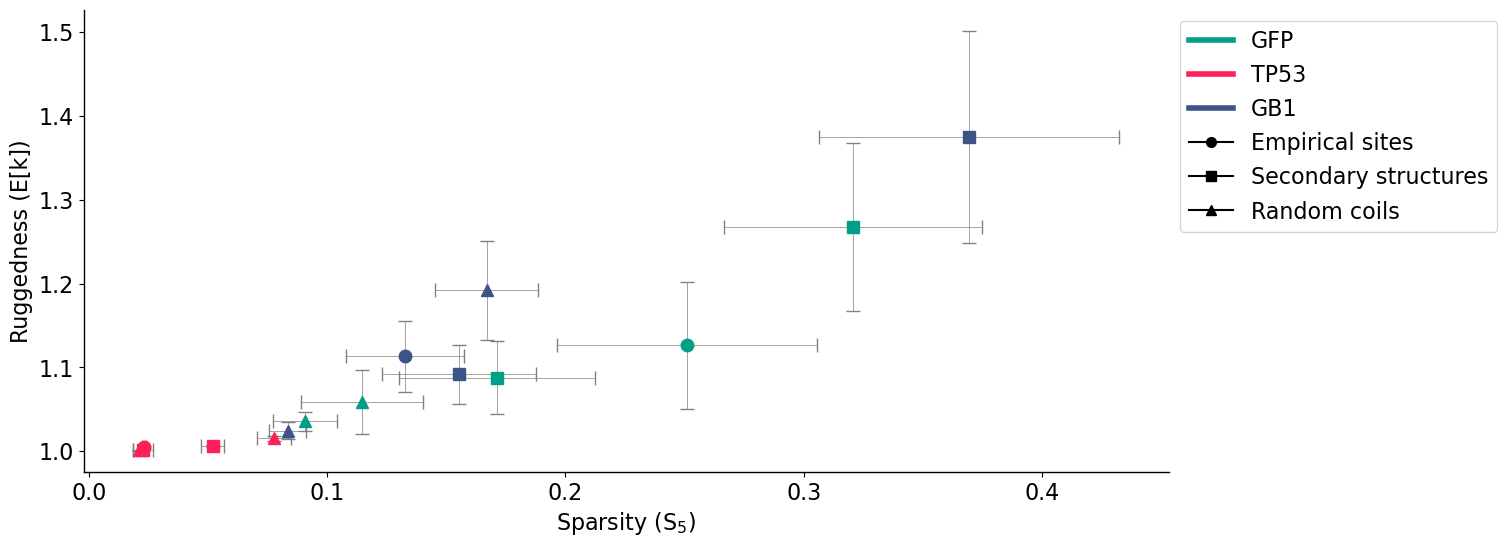

In [2]:
df = pd.read_csv(r'results/fourier_landscape.csv')

marker_map = {'Empirical sites': 'o', 'Secondary structures': 's', 'Random coils': '^'}
color_map = {'GFP': '#00a087ff', 'TP53': '#ff1f5b', 'GB1': '#3c5488'}

font_size = 16
fig, ax = plt.subplots(figsize=(14, 6))

# Plotting loop
for row in df.itertuples(index=False):
    marker = marker_map[row.Label]
    color = color_map[row.Protein]

    plt.errorbar(
        x=row.Sparsity,
        y=row.Ruggedness,
        xerr=row._2,
        yerr=row._4,
        marker=marker,
        color=color,
        label=None,  
        capsize=5,  
        markersize=9,  
        ecolor='gray',
        linewidth=0.5  
    )

# Set labels and fonts
ax.set_xlabel('Sparsity (S$_5$)', fontsize=font_size)
ax.set_ylabel('Ruggedness (E[k])', fontsize=font_size)
ax.tick_params(axis='both', labelsize=font_size)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

legend_elements = [
    Line2D([0], [0], color='#00a087ff', linestyle='-', linewidth=4, label='GFP'),
    Line2D([0], [0], color='#ff1f5b', linestyle='-', linewidth=4, label='TP53'),
    Line2D([0], [0], color='#3c5488', linestyle='-', linewidth=4, label='GB1'),
    Line2D([0], [0], marker='o', color='black', markerfacecolor='black', markersize=7, label='Empirical sites'),
    Line2D([0], [0], marker='s', color='black', markerfacecolor='black', markersize=7, label='Secondary structures'),
    Line2D([0], [0], marker='^', color='black', markerfacecolor='black', markersize=7, label='Random coils')
]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=font_size)

plt.savefig(r"fourier_landscape.svg")
plt.show()

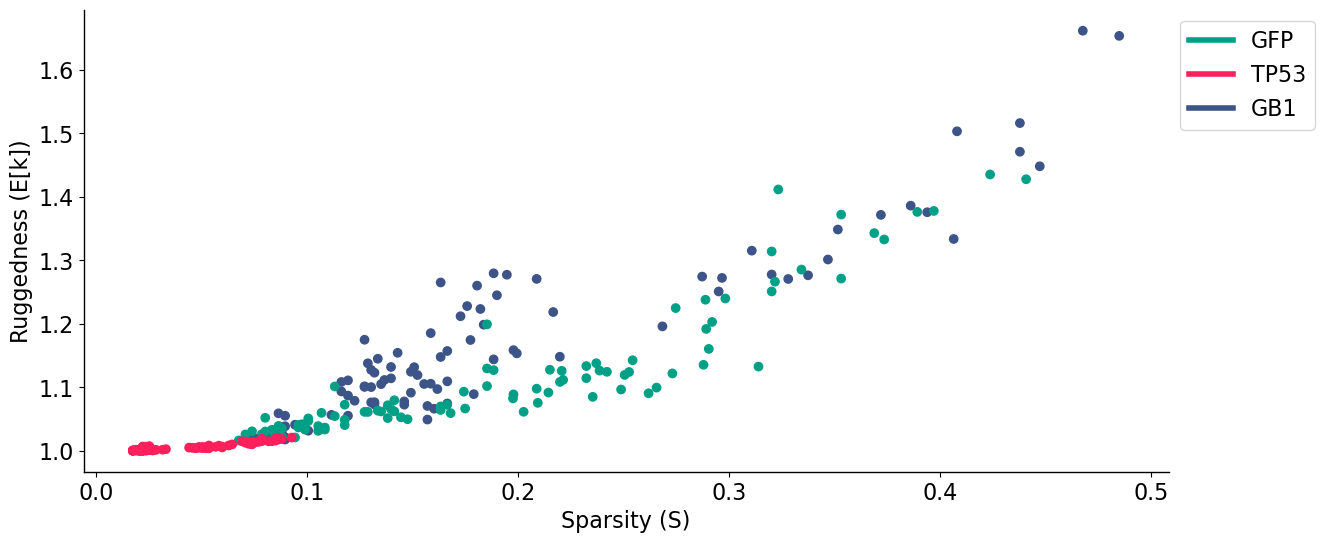

In [5]:
df = pd.read_csv(r'results/fourier_landscape_all.csv')

font_size = 16
fig, ax = plt.subplots(figsize=(14, 6))

scatter = ax.scatter(df['Sparsity'], df['Ruggedness'], c=df['Protein'].map({'GB1': '#3c5488', 'GFP': '#00a087ff', 'TP53': '#ff1f5b'}))

ax.set_xlabel('Sparsity (S)', fontsize=font_size)
ax.set_ylabel('Ruggedness (E[k])', fontsize=font_size)
ax.tick_params(axis='both', labelsize=font_size)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

legend_elements = [
    Line2D([0], [0], color='#00a087ff', linestyle='-', linewidth=4, label='GFP'),
    Line2D([0], [0], color='#ff1f5b', linestyle='-', linewidth=4, label='TP53'),
    Line2D([0], [0], color='#3c5488', linestyle='-', linewidth=4, label='GB1'),
]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), fontsize=font_size)
plt.show()
